In [133]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [135]:
df = yf.download("JNJ", start="2002-01-01")

[*********************100%***********************]  1 of 1 completed


In [136]:
def strategy(df, sma1, sma2):
    df = df.copy()
    df["ret"] = np.log(df.Close.pct_change() + 1)
    df["SMA1"] = df.Close.rolling(sma1).mean()
    df["SMA2"] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df["position"] = np.where(df["SMA1"] > df["SMA2"], 1, 0)
    df["stratret"] = df["position"].shift(1) * df["ret"]
    df = df.dropna()
    return df
 

In [137]:
strategy(df, 100, 200)

,Open,High,Low,Close,Adj Close,Volume,ret,SMA1,SMA2,position,stratret
Date,,,,,,,,,,,
2002-10-17 00:00:00-04:00,59.500000,60.200001,59.049999,60.200001,34.761604,7710900,0.021831,54.3579,57.72785,0,0.0
2002-10-18 00:00:00-04:00,59.400002,60.000000,59.200001,59.349998,34.270763,8034900,-0.014220,54.3378,57.73120,0,-0.0
2002-10-21 00:00:00-04:00,59.500000,61.299999,59.410000,61.110001,35.287060,9120500,0.029223,54.3352,57.74605,0,0.0
2002-10-22 00:00:00-04:00,60.669998,61.110001,58.200001,59.820000,34.542175,13097000,-0.021335,54.3199,57.75580,0,-0.0
2002-10-23 00:00:00-04:00,58.820000,59.099998,56.750000,57.950001,33.462353,12622700,-0.031759,54.2989,57.75810,0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,169.100006,169.630005,167.949997,168.309998,168.309998,8425400,-0.002552,171.0380,173.30715,0,-0.0
2023-01-24 00:00:00-05:00,175.000000,175.000000,166.009995,168.309998,168.309998,10541800,0.000000,171.0968,173.23755,0,0.0
2023-01-25 00:00:00-05:00,167.169998,169.509995,167.080002,169.509995,169.509995,7099800,0.007104,171.1785,173.17630,0,0.0


In [138]:
def performance(df):
    return np.exp(df[["ret", "stratret"]].sum())

In [139]:
performance(strategy(df,20,50))

ret         2.613079
stratret    0.978603
dtype: float64

In [140]:
stratdf = strategy(df, 100, 200)

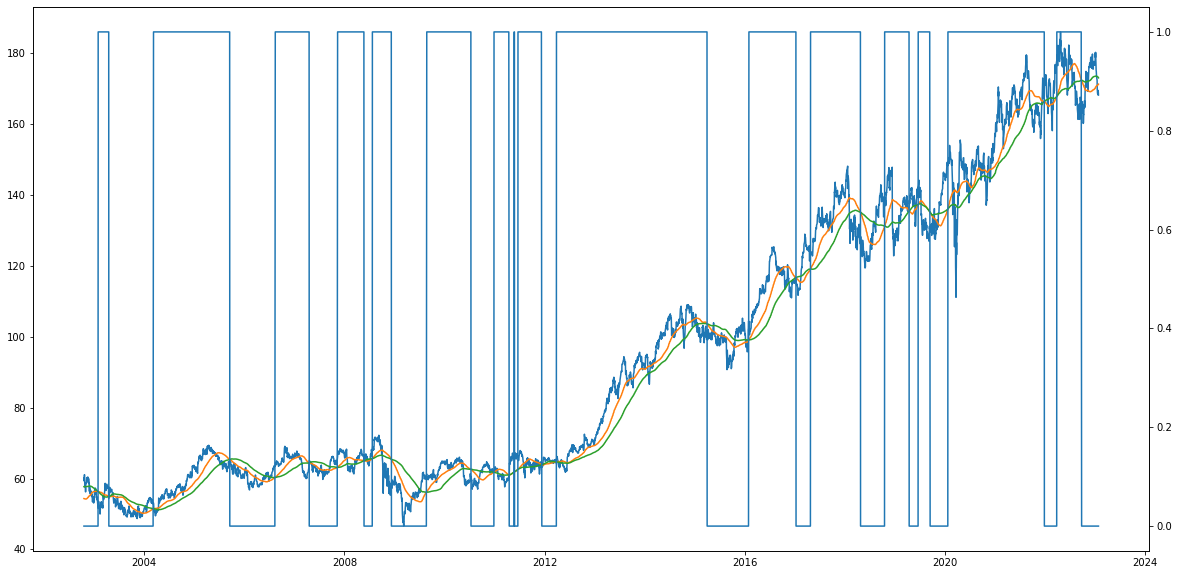

In [141]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
ax.plot(stratdf[["Close", "SMA1", "SMA2"]])
ax2.plot(stratdf["position"])

In [142]:
performance(strategy(df,85,185))

ret         3.135694
stratret    1.718760
dtype: float64

In [143]:
SMA_list1 = range(30,101,5)
SMA_list2 = range(130, 201, 5)

In [144]:
def Tester(SMAlist1, SMAlist2):
  profits = []
  a,b = [], []

  for i,e in zip(SMA_list1, SMA_list2):
    profit = performance(strategy(df, i, e))
    profits.append(profit)
    a.append(i)
    b.append(e)
  col = {"level_0":"SMA1", "level_1":"SMA2"}
  frame = pd.DataFrame(profits, [a,b]).reset_index().rename(columns=col)
  frame["edge"] = frame.stratret - frame.ret
  return frame.sort_values("edge", ascending=False)

In [145]:
#pd.DataFrame(profits, [a,b]).reset_index()

In [146]:
Tester(SMA_list1, SMA_list2)

,SMA1,SMA2,ret,stratret,edge
14,100,200,2.856197,1.718279,-1.137917
12,90,190,2.885592,1.682214,-1.203378
13,95,195,2.993416,1.753886,-1.239530
11,85,185,3.135694,1.718760,-1.416934
10,80,180,3.124048,1.472038,-1.652010
9,75,175,3.032264,1.214437,-1.817827
5,55,155,3.152145,1.254884,-1.897261
6,60,160,3.064299,1.157305,-1.906994
8,70,170,3.095878,1.147164,-1.948714
0,30,130,3.197073,1.237477,-1.959596
